In [ ]:
import pandas as pd
import numpy as np

# Load the data
df_train = pd.read_csv('../data/climate/splits/train/train.csv')
df_val = pd.read_csv('../data/climate/splits/val/val.csv')
df_test = pd.read_csv('../data/climate/splits/test/test.csv')

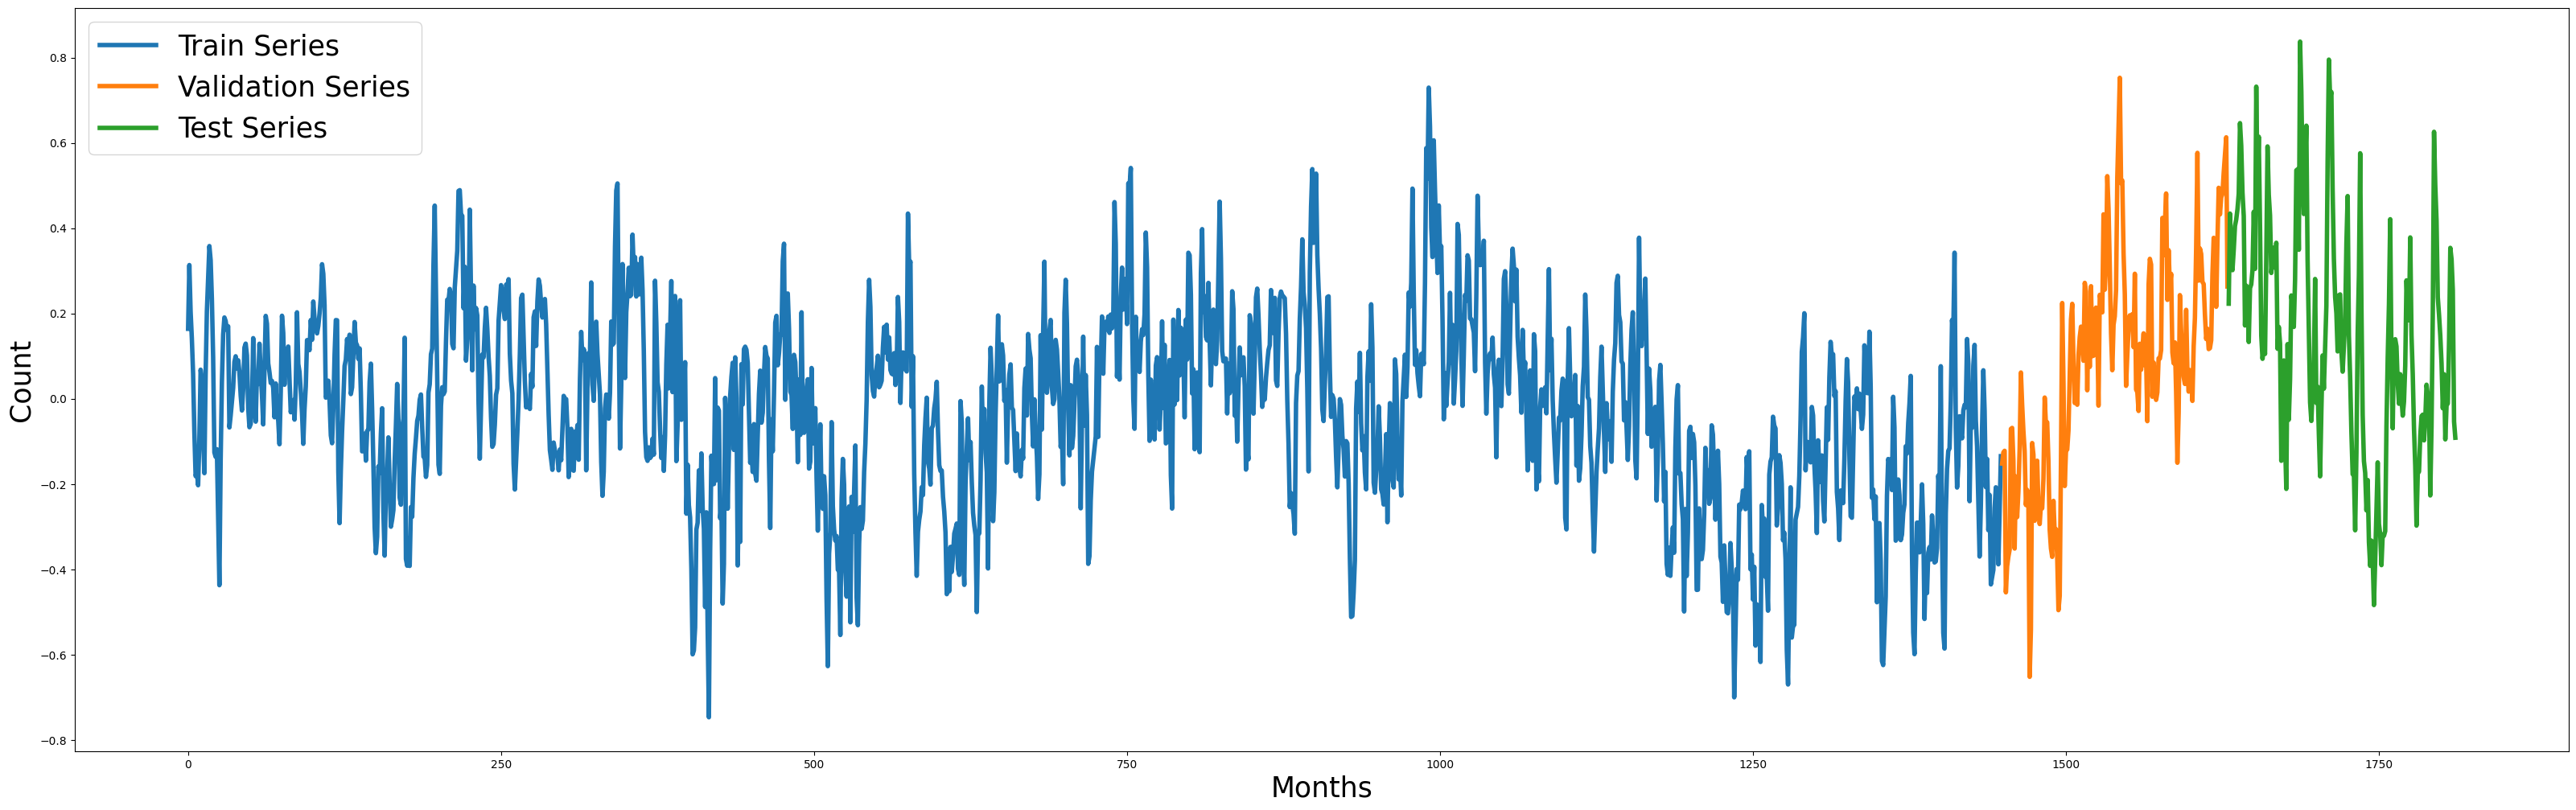

In [2]:
from matplotlib import pyplot as plt
f = plt.figure()
f.set_figwidth(40)
f.set_figheight(12)
# Create an array for the x-axis
x_train = np.arange(len(df_train))
x_val = np.arange(len(df_train), len(df_train) + len(df_val))
x_test = np.arange(len(df_train) + len(df_val), len(df_train) + len(df_val) + len(df_test))

plt.plot(x_train, df_train['AMOC0'], linewidth = 4, label = "Train Series")
plt.plot(x_val, df_val['AMOC0'], linewidth = 4, label = "Validation Series")
plt.plot(x_test, df_test['AMOC0'], linewidth = 4, label = "Test Series")

plt.legend(fontsize=25)
plt.xlabel('Months', fontsize = 25)
plt.ylabel('Count', fontsize = 25)
plt.show()

Test MSE: 0.145


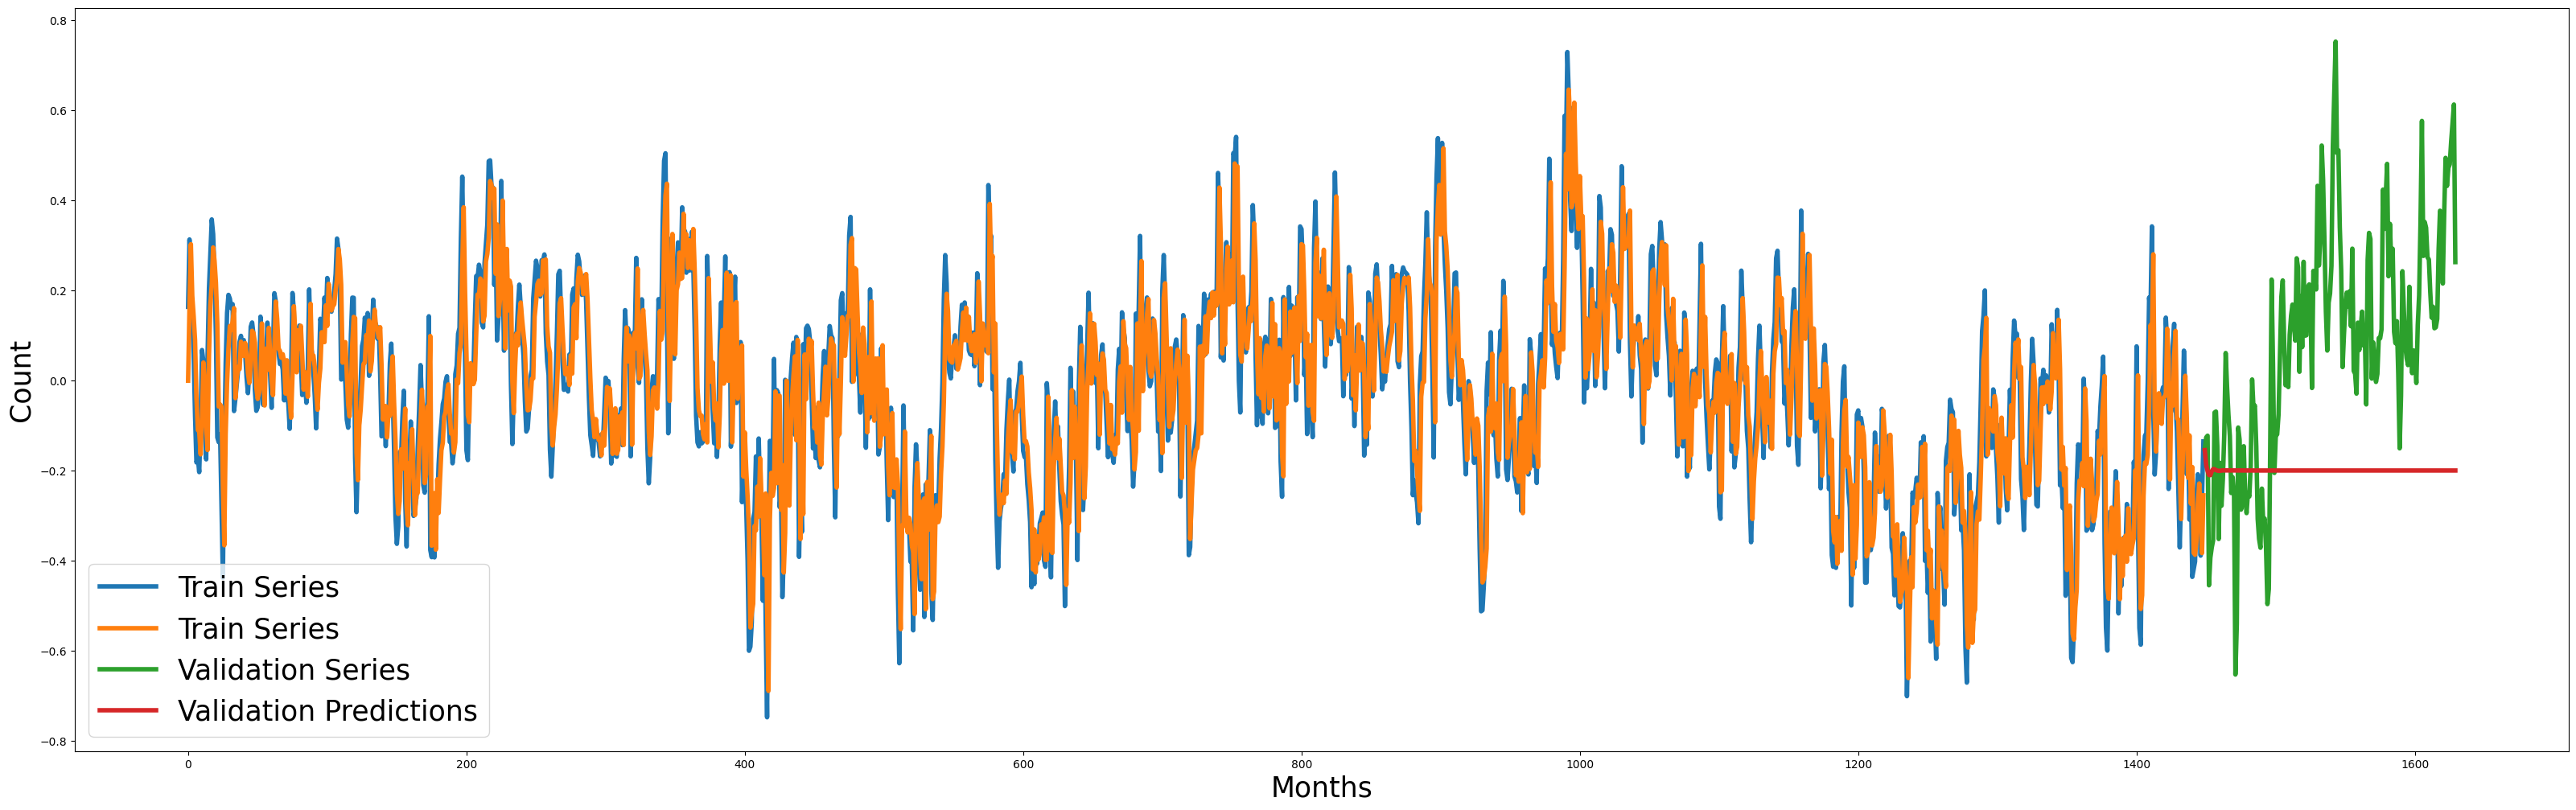

In [16]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

model = ARIMA(df_train['AMOC0'], order=(5,1,0))
model_fit = model.fit()

# make prediction
yhat = model_fit.forecast(steps=len(df_val))
error = mean_squared_error(df_val['AMOC0'], yhat)
print('Test MSE: %.3f' % error)

f = plt.figure()
f.set_figwidth(40)
f.set_figheight(12)
# Create an array for the x-axis
x_train = np.arange(len(df_train))
x_val = np.arange(len(df_train), len(df_train) + len(df_val))
# plot the predictions
plt.plot(x_train, df_train['AMOC0'], linewidth = 4, label = "Train Series")
plt.plot(x_train, model_fit.fittedvalues, linewidth = 4, label = "Train Series")
plt.plot(x_val, df_val['AMOC0'], linewidth = 4, label = "Validation Series")
plt.plot(x_val, yhat, linewidth = 4, label = "Validation Predictions")
plt.legend(fontsize=25)
plt.xlabel('Months', fontsize = 25)
plt.ylabel('Count', fontsize = 25)
plt.show()



In [13]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order, train_set, val_set):
 # prepare training dataset
 history = [x for x in train_set]
 # make predictions
 predictions = list()
 predicted_history = [x for x in train_set]
 for t in range(len(val_set)):
    model = ARIMA(predicted_history, order=arima_order)
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    history.append(val_set[t])
    predicted_history.append(yhat)
 # calculate out of sample error
 error = mean_squared_error(val_set, predictions)
 return error, predictions, predicted_history

mse, predictions, predicted_history = evaluate_arima_model(df_train['AMOC0'], (5,1,0), df_train['AMOC0'], df_val['AMOC0'])

/Users/nielsaalundkrogsgaard/documents_local/local_envs/data_sci/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/nielsaalundkrogsgaard/documents_local/local_envs/data_sci/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/nielsaalundkrogsgaard/documents_local/local_envs/data_sci/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/nielsaalundkrogsgaard/documents_local/local_envs/data_sci/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization

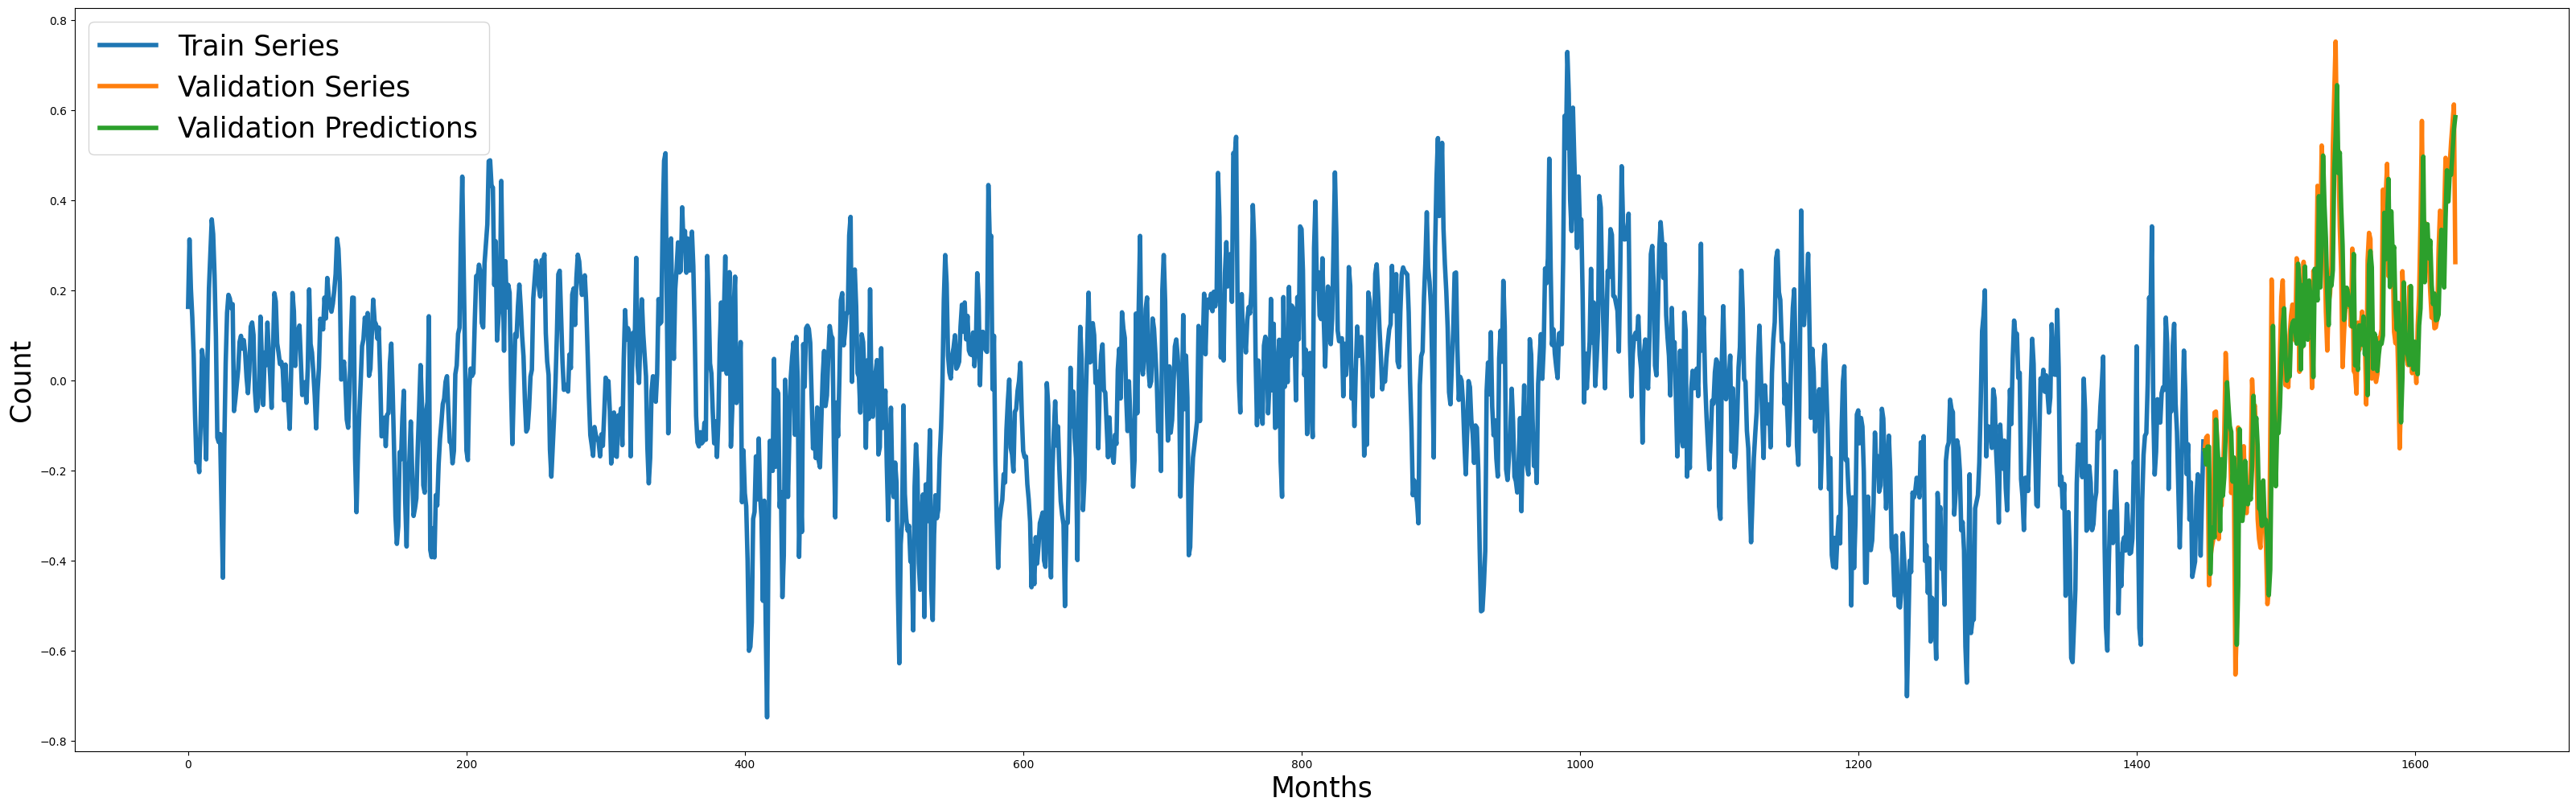

In [12]:
f = plt.figure()
f.set_figwidth(40)
f.set_figheight(12)
# Create an array for the x-axis
x_train = np.arange(len(df_train))
x_val = np.arange(len(df_train), len(df_train) + len(df_val))
# plot the predictions
plt.plot(x_train, df_train['AMOC0'], linewidth = 4, label = "Train Series")
plt.plot(x_val, df_val['AMOC0'], linewidth = 4, label = "Validation Series")
plt.plot(x_val, predictions, linewidth = 4, label = "Validation Predictions")
plt.legend(fontsize=25)
plt.xlabel('Months', fontsize = 25)
plt.ylabel('Count', fontsize = 25)
plt.show()

In [18]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import ParameterGrid

params_evaluated = []
train_loss = []
val_loss = []

# create a parameter grid
param_space = {
    'p': range(0, 3),
    'd': range(0, 3),
    'q': range(0, 3),
    'trend': ['n', 'c', 't', 'ct']
}

param_grid = ParameterGrid(param_space)

for params in param_grid:
    try:
        p,d,q = params['p'],params['d'], params['q']
        trend = params['trend']

        model = ARIMA(df_train['AMOC0'], order=(p,d,q), trend = trend)
        predictions = model.fit()
        mse_train = mean_squared_error(df_train['AMOC0'], predictions.fittedvalues)  
        mse_val = mean_squared_error(df_val['AMOC0'], predictions.forecast(steps = len(df_val['AMOC0'])))   
        params_evaluated.append(params)
        train_loss.append(mse_train)
        val_loss.append(mse_val)
    except:
        print(f"Exception raised for {params}")
        #pass 
        params_evaluated.append(params)
        train_loss.append(1e5)
        val_loss.append(1e5)

print(val_loss)

/Users/nielsaalundkrogsgaard/documents_local/local_envs/data_sci/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/nielsaalundkrogsgaard/documents_local/local_envs/data_sci/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/nielsaalundkrogsgaard/documents_local/local_envs/data_sci/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/nielsaalundkrogsgaard/documents_local/local_envs/data_sci/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization

Exception raised for {'d': 1, 'p': 0, 'q': 0, 'trend': 'c'}
Exception raised for {'d': 1, 'p': 0, 'q': 0, 'trend': 'ct'}
Exception raised for {'d': 1, 'p': 0, 'q': 1, 'trend': 'c'}
Exception raised for {'d': 1, 'p': 0, 'q': 1, 'trend': 'ct'}
Exception raised for {'d': 1, 'p': 0, 'q': 2, 'trend': 'c'}
Exception raised for {'d': 1, 'p': 0, 'q': 2, 'trend': 'ct'}
Exception raised for {'d': 1, 'p': 1, 'q': 0, 'trend': 'c'}


/Users/nielsaalundkrogsgaard/documents_local/local_envs/data_sci/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/nielsaalundkrogsgaard/documents_local/local_envs/data_sci/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/nielsaalundkrogsgaard/documents_local/local_envs/data_sci/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Exception raised for {'d': 1, 'p': 1, 'q': 0, 'trend': 'ct'}
Exception raised for {'d': 1, 'p': 1, 'q': 1, 'trend': 'c'}


/Users/nielsaalundkrogsgaard/documents_local/local_envs/data_sci/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/nielsaalundkrogsgaard/documents_local/local_envs/data_sci/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Exception raised for {'d': 1, 'p': 1, 'q': 1, 'trend': 'ct'}
Exception raised for {'d': 1, 'p': 1, 'q': 2, 'trend': 'c'}
Exception raised for {'d': 1, 'p': 1, 'q': 2, 'trend': 'ct'}
Exception raised for {'d': 1, 'p': 2, 'q': 0, 'trend': 'c'}


/Users/nielsaalundkrogsgaard/documents_local/local_envs/data_sci/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Exception raised for {'d': 1, 'p': 2, 'q': 0, 'trend': 'ct'}
Exception raised for {'d': 1, 'p': 2, 'q': 1, 'trend': 'c'}
Exception raised for {'d': 1, 'p': 2, 'q': 1, 'trend': 'ct'}
Exception raised for {'d': 1, 'p': 2, 'q': 2, 'trend': 'c'}


/Users/nielsaalundkrogsgaard/documents_local/local_envs/data_sci/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Exception raised for {'d': 1, 'p': 2, 'q': 2, 'trend': 'ct'}
Exception raised for {'d': 2, 'p': 0, 'q': 0, 'trend': 'c'}
Exception raised for {'d': 2, 'p': 0, 'q': 0, 'trend': 't'}
Exception raised for {'d': 2, 'p': 0, 'q': 0, 'trend': 'ct'}
Exception raised for {'d': 2, 'p': 0, 'q': 1, 'trend': 'c'}
Exception raised for {'d': 2, 'p': 0, 'q': 1, 'trend': 't'}
Exception raised for {'d': 2, 'p': 0, 'q': 1, 'trend': 'ct'}
Exception raised for {'d': 2, 'p': 0, 'q': 2, 'trend': 'c'}
Exception raised for {'d': 2, 'p': 0, 'q': 2, 'trend': 't'}
Exception raised for {'d': 2, 'p': 0, 'q': 2, 'trend': 'ct'}
Exception raised for {'d': 2, 'p': 1, 'q': 0, 'trend': 'c'}
Exception raised for {'d': 2, 'p': 1, 'q': 0, 'trend': 't'}
Exception raised for {'d': 2, 'p': 1, 'q': 0, 'trend': 'ct'}
Exception raised for {'d': 2, 'p': 1, 'q': 1, 'trend': 'c'}
Exception raised for {'d': 2, 'p': 1, 'q': 1, 'trend': 't'}
Exception raised for {'d': 2, 'p': 1, 'q': 1, 'trend': 'ct'}
Exception raised for {'d': 2, 'p':

/Users/nielsaalundkrogsgaard/documents_local/local_envs/data_sci/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Exception raised for {'d': 2, 'p': 2, 'q': 1, 'trend': 'c'}
Exception raised for {'d': 2, 'p': 2, 'q': 1, 'trend': 't'}
Exception raised for {'d': 2, 'p': 2, 'q': 1, 'trend': 'ct'}
Exception raised for {'d': 2, 'p': 2, 'q': 2, 'trend': 'c'}
Exception raised for {'d': 2, 'p': 2, 'q': 2, 'trend': 't'}
Exception raised for {'d': 2, 'p': 2, 'q': 2, 'trend': 'ct'}
[0.07187117014721436, 0.0774733768522116, 0.09944035973754424, 0.11392867163320547, 0.07178936817812281, 0.07742287854301577, 0.0969758939308394, 0.11176820272131023, 0.07179837554417175, 0.07743782741930873, 0.09694696479266154, 0.11169928853410022, 0.07051486838671545, 0.07654834856451422, 0.09692721601975872, 0.11168539361699611, 0.07061773949457938, 0.07657608782820881, 0.09681679285465014, 0.1116579434968881, 0.06941009875356897, 0.07568304153128338, 0.09691771315815136, 0.11184998173969071, 0.07060135963971775, 0.07661867507671143, 0.09681626617748408, 0.11165774510059559, 0.07060995654324272, 0.0765628379865248, 0.134471631

/Users/nielsaalundkrogsgaard/documents_local/local_envs/data_sci/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [22]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from mango import scheduler, Tuner

def arima_objective_function(args_list):
    global df_train
    global df_val

    params_evaluated = []
    train_loss = []
    val_loss = []
    val_loss_int = []
    
    for params in args_list:
        try:
            p,d,q = params['p'],params['d'], params['q']
            trend = params['trend']
            
            model = ARIMA(df_train['AMOC0'], order=(p,d,q), trend = trend)
            predictions = model.fit()
            mse_train = mean_squared_error(df_train['AMOC0'], predictions.fittedvalues)  
            mse_val = mean_squared_error(df_val['AMOC0'], predictions.forecast(steps = len(df_val['AMOC0'])))   
            params_evaluated.append(params)
            train_loss.append(mse_train)
            val_loss.append(mse_val)

        except:
            #print(f"Exception raised for {params}")
            #pass 
            params_evaluated.append(params)
            train_loss.append(1e5)
            val_loss.append(1e5)
        
        #print(params_evaluated, mse)
    return params_evaluated, val_loss

param_space = dict(p= range(0, 10),
                   d= range(0, 10),
                   q =range(0, 10),
                   trend = ['n', 'c', 't', 'ct']
                  )

conf_Dict = dict()
conf_Dict['num_iteration'] = 200
tuner = Tuner(param_space, arima_objective_function, conf_Dict)
results = tuner.minimize()
print('best parameters:', results['best_params'])
print('best loss:', results['best_objective'])

  0%|          | 0/200 [00:00<?, ?it/s]

best parameters: {'d': 3, 'p': 7, 'q': 9, 'trend': 'n'}
best loss: 0.05488455840730955


{'d': 3, 'p': 7, 'q': 9, 'trend': 'n'}
final model: (7, 3, 9) n
MSE error is: 0.05488455840730955


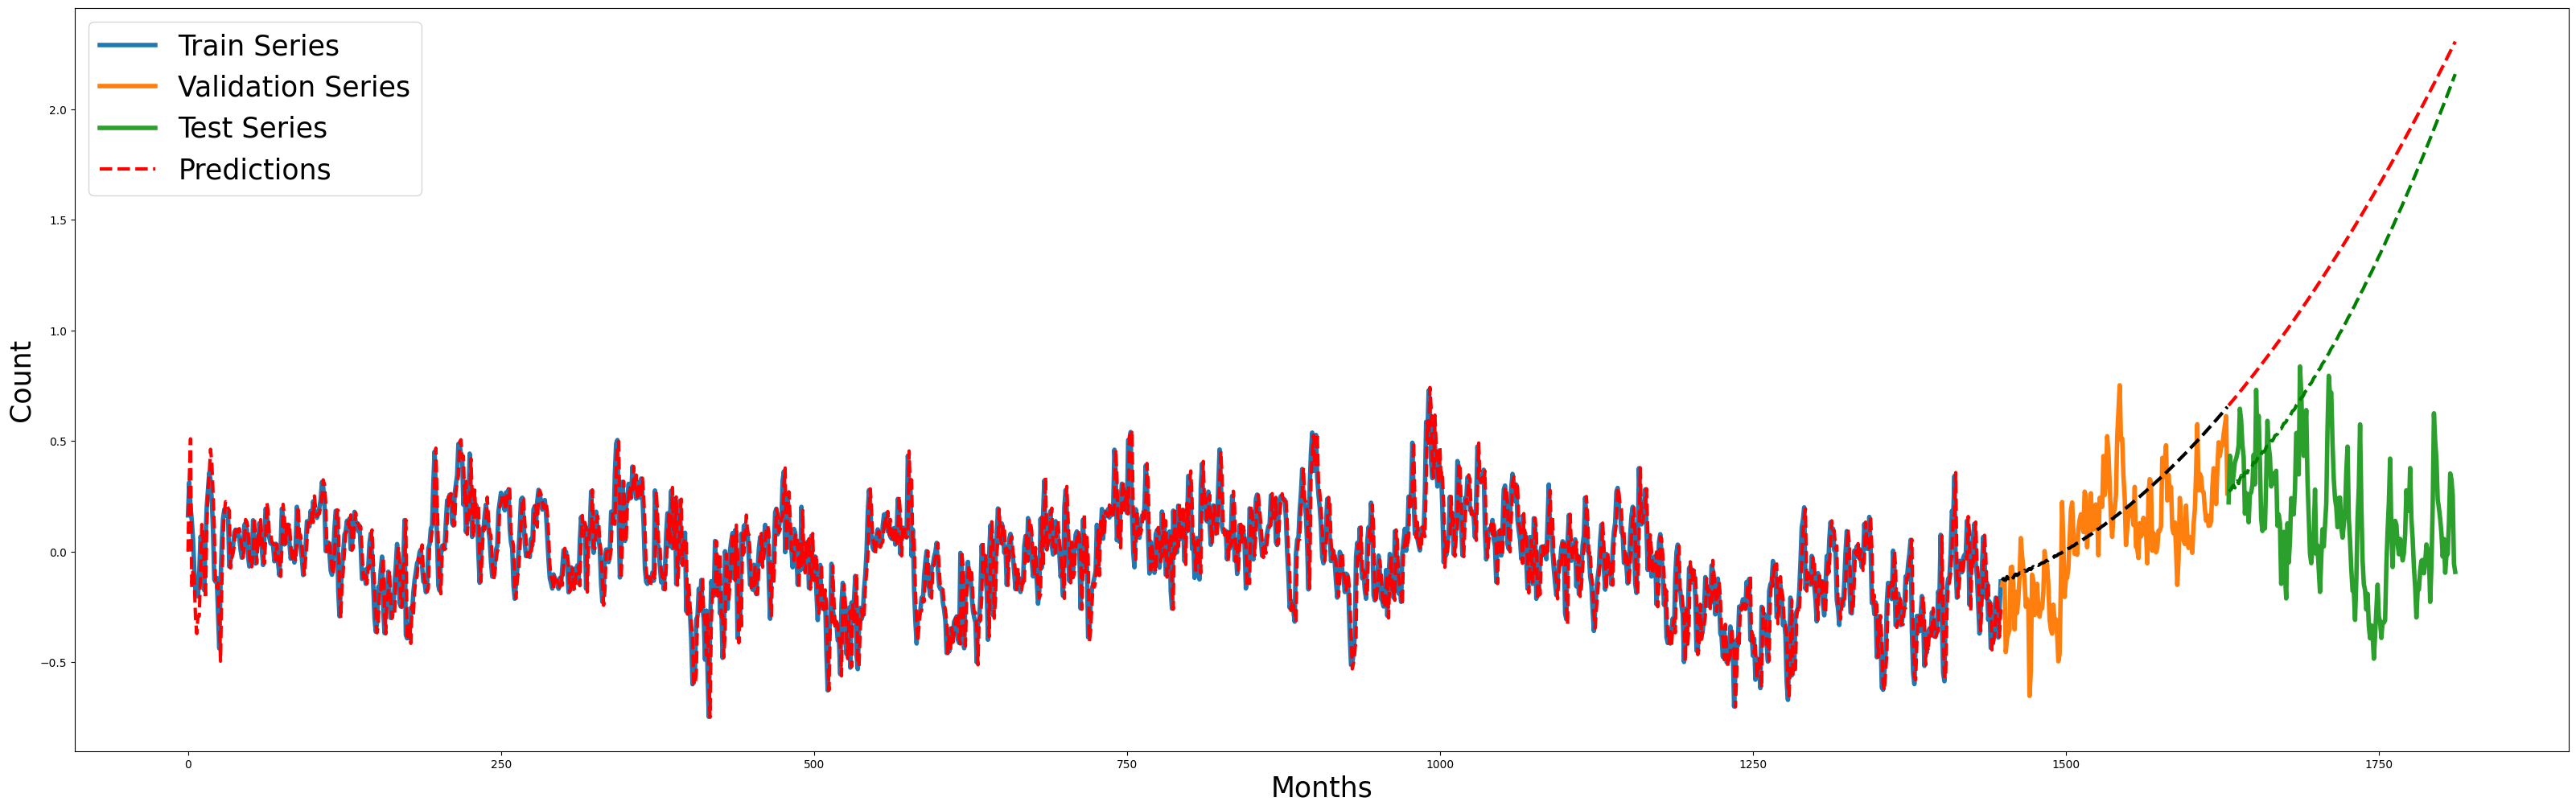

In [31]:
def plot_arima(data_train, data_val, data_test, order = (1,1,1), trend = 'c'):
    print('final model:', order, trend)
    model = ARIMA(data_train, order=order, trend = trend)
    results = model.fit()

    model_test = ARIMA(pd.concat([data_train, data_val]), order=order, trend = trend)
    results_test = model_test.fit()
    
    error = mean_squared_error(data_val, results.forecast(steps = len(data_val))) 
    print('MSE error is:', error)
    
    from matplotlib import pyplot as plt
    f = plt.figure()
    f.set_figwidth(40)
    f.set_figheight(12)
    
    x_train = np.arange(len(data_train))
    x_val = np.arange(len(data_train), len(data_train) + len(data_val))
    x_test = np.arange(len(data_train) + len(data_val), len(data_train) + len(data_val) + len(data_test))

    plt.plot(x_train, data_train, linewidth = 4, label = "Train Series")
    plt.plot(x_val, data_val, linewidth = 4, label = "Validation Series")
    plt.plot(x_test, data_test, linewidth = 4, label = "Test Series")

    plt.plot(x_train, results.fittedvalues, color='red', label = "Predictions", linestyle='dashed', linewidth = 3)
    plt.plot(x_val, results.forecast(steps = len(data_val)), color='black', linestyle='dashed', linewidth = 3)
    plt.plot(x_test, results.forecast(steps = len(data_val)+len(data_test))[len(data_val):], color='red', linestyle='dashed', linewidth = 3)
    plt.plot(x_test, results_test.forecast(steps = len(data_test)), color='green', linestyle='dashed', linewidth = 3)
    plt.legend(fontsize = 25)
    plt.xlabel('Months', fontsize = 25)
    plt.ylabel('Count', fontsize = 25)
    plt.show()

print(results['best_params'])

order = (results['best_params']['p'], results['best_params']['d'], results['best_params']['q'])
plot_arima(df_train['AMOC0'], df_val['AMOC0'], df_test['AMOC0'], order=order, trend = results['best_params']['trend'])

In [10]:
import pmdarima as pm
from pmdarima import model_selection
import pandas as pd
from sklearn.metrics import mean_squared_error
from mango import Tuner

df_train = pd.read_csv('data/climate/splits/train/train.csv')

def arima_objective_function(args_list):
    global df_train
    
    val_num = round(len(df_train)*0.2, 0)

    cv = model_selection.RollingForecastCV(h=val_num, step=val_num, initial=val_num)

    params_evaluated = []
    model_cv_score_list = []
    
    for params in args_list:
        try:
            p,d,q = params['p'],params['d'], params['q']
            trend = params['trend']

            model = pm.ARIMA(order=(p,d,q), trend = trend)
            
            model_cv_scores = model_selection.cross_val_score(model, df_train['AMOC0'], scoring='mean_squared_error', cv=cv, verbose=2)
            model_cv_score_list.append(model_cv_scores)  
            params_evaluated.append(params)

        except:
            #print(f"Exception raised for {params}")
            #pass 
            params_evaluated.append(params)
            model_cv_score_list.append(1e5)
        
    return params_evaluated, model_cv_score_list

param_space = dict(p= range(0, 3),
                   d= range(0, 3),
                   q =range(0, 3),
                   trend = ['n', 'c', 't', 'ct']
                  )

conf_Dict = dict()
conf_Dict['num_iteration'] = 200
tuner = Tuner(param_space, arima_objective_function, conf_Dict)
results = tuner.minimize()
print('best parameters:', results['best_params'])
print('best loss:', results['best_objective'])

ImportError: cannot import name 'Tuner' from 'mango' (/Users/nielsaalundkrogsgaard/opt/anaconda3/lib/python3.9/site-packages/mango/__init__.py)